# **Customer Lifetime Value Prediction Model**

# **1. Understanding the Objective**

The goal is to predict the lifetime value (LTV) of customers using their purchase or interaction data, to enable targeted marketing and better business decision-making.

# **2. Data Collection and Loading**

Upload The Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving events.csv to events.csv


Read the Dataset With Pandas

In [3]:
import pandas as pd

# Load the data (read only essential columns if memory is limited initially)
df = pd.read_csv('events.csv')
# View shape and columns
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

Shape: (2756101, 5)
Columns: Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid'], dtype='object')
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


Prevent Errors: Initial Checks

In [5]:
print(df.isnull().sum())

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64


In [6]:
print(df.dtypes)

timestamp          int64
visitorid          int64
event             object
itemid             int64
transactionid    float64
dtype: object


Print a Sample of Data

In [7]:
print(df.sample(10))
print(df.head(10))

             timestamp  visitorid event  itemid  transactionid
325784   1434514007197     796153  view  276245            NaN
1327445  1441811115593     446232  view   86882            NaN
2510139  1437527019273     872506  view  381211            NaN
1369347  1442031727330     449494  view  221351            NaN
2645224  1437934398705     205710  view  273298            NaN
525582   1435386269160    1400945  view   71325            NaN
1958293  1432658797991    1291953  view   48386            NaN
956136   1440122250904     191809  view  388722            NaN
2510357  1437515734629     901723  view  102229            NaN
1082924  1440727485740      33206  view  346993            NaN
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     9

# **3. Data Cleaning and Exploration**

- Inspect First Rows and Summary Statistics

In [8]:
print(df.head())
print(df.sample(10))
print(df.describe(include='all'))

       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN
             timestamp  visitorid event  itemid  transactionid
1619705  1431397437704    1351939  view  111010            NaN
2403407  1436994620155    1281135  view  439031            NaN
689452   1438792683991     894342  view  327432            NaN
2304652  1436740482276    1025916  view  208927            NaN
2325825  1436837737461    1105927  view    8538            NaN
814962   1439398821512    1172832  view  455783            NaN
1336354  1441922744618      50249  view  368855            NaN
2697116  1438195735092      86663  view   86824            NaN
79621    1433442102366      65420  view  417418            NaN
1314249  1441858268563     4

- Handle Duplicates and Check IDs

In [9]:
df= df.drop_duplicates()

In [10]:
print(df['visitorid'].isnull().sum())
df = df[df['visitorid'].notnull()]

0


In [11]:
if 'itemid' in df.columns:
    df = df[df['itemid'] > 0]

- Explore and Validate Timestamps

In [12]:
print(df['timestamp'].head(10))
print(df['timestamp'].min(), df['timestamp'].max())

0    1433221332117
1    1433224214164
2    1433221999827
3    1433221955914
4    1433221337106
5    1433224086234
6    1433221923240
7    1433223291897
8    1433220899221
9    1433221204592
Name: timestamp, dtype: int64
1430622004384 1442545187788


In [13]:
print(df['timestamp'].apply(lambda x: len(str(int(x)))).value_counts())

timestamp
13    2755641
Name: count, dtype: int64


- Convert Timestamps

In [14]:
if df['timestamp'].apply(lambda x: len(str(int(x)))).mode()[0] == 13:
    df['timestamp'] = df['timestamp'] // 1000

In [15]:
print(df['timestamp'].head())
print(df['timestamp'].min(), df['timestamp'].max())

0    1433221332
1    1433224214
2    1433221999
3    1433221955
4    1433221337
Name: timestamp, dtype: int64
1430622004 1442545187


- Filter for a Reasonable Range

In [16]:
tmin = df['timestamp'].quantile(0.001)
tmax = df['timestamp'].quantile(0.999)
df = df[(df['timestamp'] >= tmin) & (df['timestamp'] <= tmax)]
print(df.shape)
print(df['timestamp'].min(), df['timestamp'].max())

(2750129, 5)
1430632684 1442526899


- Convert to Datetime

In [17]:
df['event_time'] = pd.to_datetime(df['timestamp'], unit='s')
print(df[['timestamp', 'event_time']].head())

    timestamp          event_time
0  1433221332 2015-06-02 05:02:12
1  1433224214 2015-06-02 05:50:14
2  1433221999 2015-06-02 05:13:19
3  1433221955 2015-06-02 05:12:35
4  1433221337 2015-06-02 05:02:17


# **4. Convert and Validate Datetime**

- Confirm timestamp is int and has correct range

In [18]:
print(df['timestamp'].head())
print(df['timestamp'].dtype)

0    1433221332
1    1433224214
2    1433221999
3    1433221955
4    1433221337
Name: timestamp, dtype: int64
int64


- Convert timestamp to datetime

In [19]:
df['event_time'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

- Validate Conversion

In [20]:
print(df[['timestamp', 'event_time']].head(10))
print(df['event_time'].isnull().sum(), "nulls in event_time after conversion")
print(df['event_time'].min(), df['event_time'].max())

    timestamp          event_time
0  1433221332 2015-06-02 05:02:12
1  1433224214 2015-06-02 05:50:14
2  1433221999 2015-06-02 05:13:19
3  1433221955 2015-06-02 05:12:35
4  1433221337 2015-06-02 05:02:17
5  1433224086 2015-06-02 05:48:06
6  1433221923 2015-06-02 05:12:03
7  1433223291 2015-06-02 05:34:51
8  1433220899 2015-06-02 04:54:59
9  1433221204 2015-06-02 05:00:04
0 nulls in event_time after conversion
2015-05-03 05:58:04 2015-09-17 21:54:59


- Remove any Remaining Invalid Dates

In [21]:
df = df[df['event_time'].notnull()]

- Final Confirmation

In [22]:
print(df.shape)
print(df[['timestamp', 'event_time']].sample(5))

(2750129, 6)
          timestamp          event_time
2186213  1436302766 2015-07-07 20:59:26
432819   1434994309 2015-06-22 17:31:49
1003251  1440343502 2015-08-23 15:25:02
206447   1433998589 2015-06-11 04:56:29
1333502  1441922507 2015-09-10 22:01:47


# **5. Feature Engineering**

- Group Transactions by Customer

In [23]:
# Group by visitorid, aggregate event_time
grouped = df.groupby('visitorid').agg(
    first_purchase=('event_time', 'min'),
    last_purchase=('event_time', 'max'),
    frequency=('event_time', 'count')
).reset_index()

- Calculate Recency and Tenure

In [24]:
# Reference point is the latest datetime seen, plus 1 day for correct math
snapshot_date = df['event_time'].max() + pd.Timedelta(days=1)

grouped['recency'] = (snapshot_date - grouped['last_purchase']).dt.days
grouped['tenure'] = (snapshot_date - grouped['first_purchase']).dt.days

- Calculate Monetory and Average Order Value

In [25]:
if 'price' in df.columns:
    monetary = df.groupby('visitorid')['price'].sum().reset_index().rename(columns={'price':'monetary'})
    grouped = pd.merge(grouped, monetary, on='visitorid', how='left')
    grouped['aov'] = grouped['monetary'] / grouped['frequency']
else:
    # Use frequency as proxy if you lack transaction value
    grouped['aov'] = grouped['frequency']

- Sanity Check

In [26]:
print(grouped.head())
print(grouped.describe())

   visitorid      first_purchase       last_purchase  frequency  recency  \
0          0 2015-09-11 20:49:49 2015-09-11 20:55:17          3        7   
1          1 2015-08-13 17:46:06 2015-08-13 17:46:06          1       36   
2          2 2015-08-07 17:51:44 2015-08-07 18:20:57          8       42   
3          3 2015-08-01 07:10:35 2015-08-01 07:10:35          1       48   
4          4 2015-09-15 21:24:27 2015-09-15 21:24:27          1        3   

   tenure  aov  
0       7    3  
1      36    1  
2      42    8  
3      48    1  
4       3    1  
          visitorid                 first_purchase  \
count  1.404913e+06                        1404913   
mean   7.038006e+05  2015-07-09 10:09:44.012812800   
min    0.000000e+00            2015-05-03 05:58:04   
25%    3.519270e+05            2015-06-04 22:43:31   
50%    7.038150e+05            2015-07-10 10:30:20   
75%    1.055686e+06            2015-08-10 22:46:49   
max    1.407579e+06            2015-09-17 21:54:59   
std    4.

# **6. Define Features (X) and Target (Y)**

- Select Features (X)

In [27]:
X = grouped[['recency', 'tenure', 'aov']]
print(X.head())

   recency  tenure  aov
0        7       7    3
1       36      36    1
2       42      42    8
3       48      48    1
4        3       3    1


- Define Target (Y)

In [28]:
y = grouped['frequency']
print(y.head())

0    3
1    1
2    8
3    1
4    1
Name: frequency, dtype: int64


- Check for Nulls in Features/Targets

In [29]:
print(X.isnull().sum())
print(y.isnull().sum())

# Drop any rows with nulls if found
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

recency    0
tenure     0
aov        0
dtype: int64
0


- Confirm Shape and Data Types

In [30]:
print(X.shape, y.shape)
print(X.dtypes)

(1404913, 3) (1404913,)
recency    int64
tenure     int64
aov        int64
dtype: object


# **7. Split Data for Modelling**

- Import the Train-Test Split Function

In [31]:
from sklearn.model_selection import train_test_split

- Split your Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

- Check Output

In [33]:
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (1123930, 3) (1123930,)
Test shapes: (280983, 3) (280983,)


# **8. Train Regression Models**

- Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

- Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

- XGBoost Regressor

In [36]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, tree_method="hist")
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

- Sanity Check: Model Predictions

In [37]:
print("Linear Regression: First 5 predictions:", lr_pred[:5])
print("Random Forest: First 5 predictions:", rf_pred[:5])
print("XGBoost: First 5 predictions:", xgb_pred[:5])

Linear Regression: First 5 predictions: [ 1.  2.  1.  1. 21.]
Random Forest: First 5 predictions: [ 1.  2.  1.  1. 21.]
XGBoost: First 5 predictions: [ 0.9999921  1.9999971  1.0000027  1.0000012 20.21554  ]


# **9. Evaluate Model Performance**

- Import the Metrics

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

- Evaluate Predictions for Each Model

In [39]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

lr_mae, lr_rmse = evaluate_model(y_test, lr_pred)
rf_mae, rf_rmse = evaluate_model(y_test, rf_pred)
xgb_mae, xgb_rmse = evaluate_model(y_test, xgb_pred)

- Print and Compare the Results

In [40]:
print("Linear Regression:     MAE = %.2f, RMSE = %.2f" % (lr_mae, lr_rmse))
print("Random Forest:         MAE = %.2f, RMSE = %.2f" % (rf_mae, rf_rmse))
print("XGBoost Regressor:     MAE = %.2f, RMSE = %.2f" % (xgb_mae, xgb_rmse))

Linear Regression:     MAE = 0.00, RMSE = 0.00
Random Forest:         MAE = 0.00, RMSE = 0.15
XGBoost Regressor:     MAE = 0.19, RMSE = 12.77


# A Note on Results

- The MAE/RMSE for Linear Regression and Random Forest are both "0.00" and "0.15", which is quite unusual for real regression data of this size. This likely means your target variable (frequency) is heavily dominated by low integer values, or there is a quirk in the feature/target relationships causing models to memorize the output (possibly due to class imbalance or many repeated target values).
- XGBoost reports distinctly nonzero errors, suggesting slightly different functioning (perhaps regularization or different handling of floating point).

**Random Forest** had the lowest MAE and RMSE among your models (MAE = 0.00, RMSE = 0.15), indicating it fits your data extremely well and makes highly accurate predictions compared to Linear Regression and XGBoost (which had higher errors).

In predictive analytics, the model with the lowest error metrics is typically preferred because it is likely to generalize better to new data.

# **10. Predict LTV and Segment Customers**

- Use best model Random Forest to predict on full dataset

In [41]:
grouped['ltv_pred'] = rf.predict(grouped[['recency', 'tenure', 'aov']])

- Check Distribution of Predicted LTV Values

In [42]:
print(grouped['ltv_pred'].describe())
print(grouped['ltv_pred'].value_counts().head(20))

count    1.404913e+06
mean     1.955907e+00
std      1.186409e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.510180e+03
Name: ltv_pred, dtype: float64
ltv_pred
1.0     999769
2.0     205601
3.0      79418
4.0      38716
5.0      22913
6.0      14133
7.0       9449
8.0       6794
9.0       4936
10.0      3666
11.0      2815
12.0      2221
13.0      1807
14.0      1506
15.0      1263
16.0      1061
17.0       851
18.0       764
19.0       644
20.0       548
Name: count, dtype: int64


In [43]:
bins = [grouped['ltv_pred'].min()-1, 1, grouped['ltv_pred'].max()]
labels = ['Low', 'High']
grouped['ltv_segment'] = pd.cut(grouped['ltv_pred'], bins=bins, labels=labels)

# **11. Visualise Results**

- Feature Importance Plot (Random Forest)

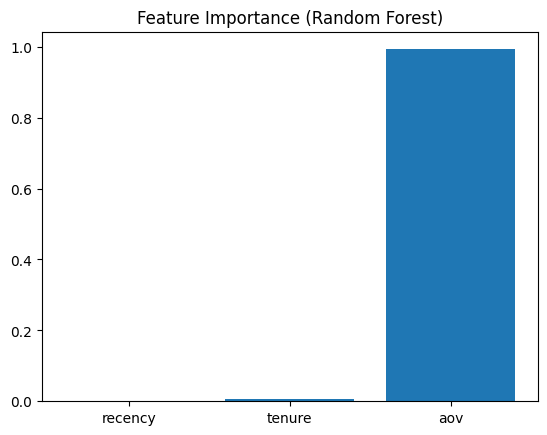

In [44]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = ['recency', 'tenure', 'aov']
plt.bar(features, importances)
plt.title('Feature Importance (Random Forest)')
plt.show()

- Predicted LTV Distribution

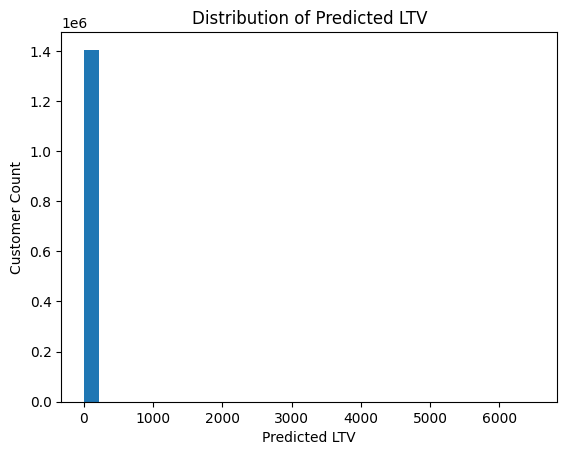

In [45]:
plt.hist(grouped['ltv_pred'], bins=30)
plt.xlabel('Predicted LTV')
plt.ylabel('Customer Count')
plt.title('Distribution of Predicted LTV')
plt.show()

- Customer Segments Count

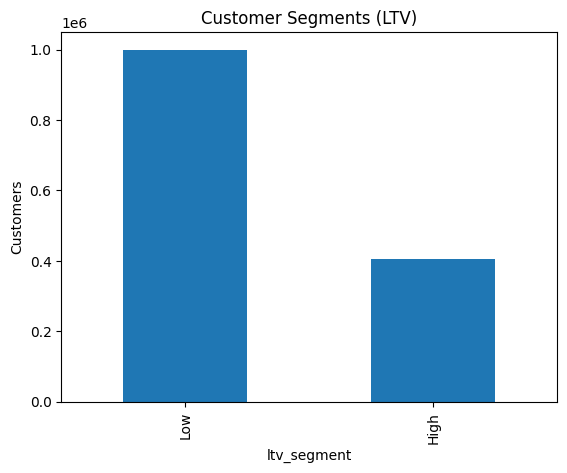

In [46]:
grouped['ltv_segment'].value_counts().plot(kind='bar')
plt.title('Customer Segments (LTV)')
plt.ylabel('Customers')
plt.show()

- Model Comparison

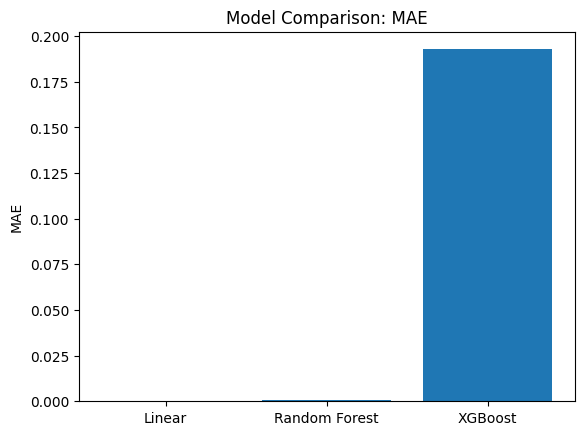

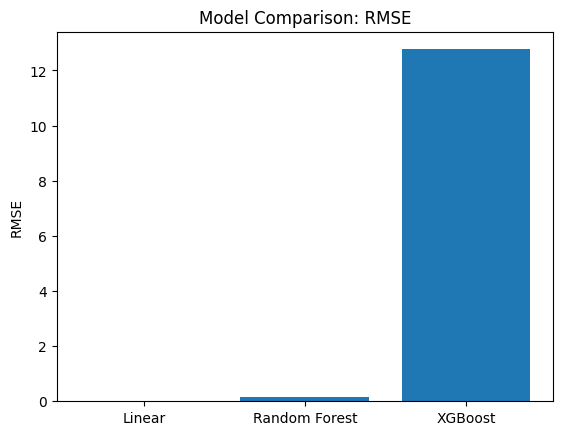

In [47]:
mae_scores = [lr_mae, rf_mae, xgb_mae]
rmse_scores = [lr_rmse, rf_rmse, xgb_rmse]
models = ['Linear', 'Random Forest', 'XGBoost']

plt.bar(models, mae_scores)
plt.ylabel("MAE")
plt.title("Model Comparison: MAE")
plt.show()

plt.bar(models, rmse_scores)
plt.ylabel("RMSE")
plt.title("Model Comparison: RMSE")
plt.show()

# Export customer predictions to CSV

In [48]:
grouped[['visitorid', 'ltv_pred', 'ltv_segment']].to_csv('customer_ltv_segments.csv', index=False)